In [163]:
import pandas as pd
import numpy as np
from scipy import stats

In [164]:
df = pd.read_csv('tacos and burritos.csv')

In [165]:
df.head()

,id,address,categories,city,country,cuisines,dateAdded,dateUpdated,keys,latitude,...,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235
0,AVwc__cikufWRAb51QjV,610 Commercial St,"Restaurant Delivery Service,Restaurants,Pizza,...",Atchison,US,Restaurant Delivery Service,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,us/ks/atchison/610commercialst/-138126000,39.561570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVwc__cikufWRAb51QjV,610 Commercial St,"Restaurant Delivery Service,Restaurants,Pizza,...",Atchison,US,Restaurant Delivery Service,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,us/ks/atchison/610commercialst/-138126000,39.561570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVwc__dF_7pvs4fz1Ncy,9521 Morton Davis Dr,"Golf Course, American Restaurant, and Resort",Patterson,US,NaN,2016-10-14T01:58:25Z,2016-10-14T01:58:25Z,us/grayson/patterson/9521mortondavisdr/-522005016,37.401855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVwc__kCByjofQCxkdm-,10550 W I 25 Frontage Rd,Fast Food Restaurant,Longmont,US,NaN,2016-09-09T17:30:34Z,2016-10-04T05:15:17Z,us/niwot/longmont/10550wi25frontagerd/-1161002137,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AVwc__WtByjofQCxkdkR,8495 W 3rd St,"Mexican Restaurant Mid-City West,Mexican Resta...",Los Angeles,US,Mexican,2016-05-19T11:50:25Z,2016-09-11T00:06:37Z,us/bicentennial/losangeles/8495w3rdst/-251199537,34.080724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
df.columns

Index(['id', 'address', 'categories', 'city', 'country', 'cuisines',
       'dateAdded', 'dateUpdated', 'keys', 'latitude',
       ...
       'Unnamed: 226', 'Unnamed: 227', 'Unnamed: 228', 'Unnamed: 229',
       'Unnamed: 230', 'Unnamed: 231', 'Unnamed: 232', 'Unnamed: 233',
       'Unnamed: 234', 'Unnamed: 235'],
      dtype='object', length=236)

### Cleaning the Data

In [167]:
# Filter to include only columns of interest to map

df2 = df[['id','name','address','categories','city','country','dateAdded','dateUpdated',
          'latitude','longitude','menus.amountMax','menus.amountMin','menus.currency',
          'menus.description','menus.name','postalCode','priceRangeCurrency','priceRangeMin','priceRangeMax','province']]

In [168]:
df2.head()

,id,name,address,categories,city,country,dateAdded,dateUpdated,latitude,longitude,menus.amountMax,menus.amountMin,menus.currency,menus.description,menus.name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc__cikufWRAb51QjV,Gambino's Pizza,610 Commercial St,"Restaurant Delivery Service,Restaurants,Pizza,...",Atchison,US,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,39.561570,-95.121020,NaN,NaN,NaN,NaN,Taco,66002,NaN,NaN,NaN,KS
1,AVwc__cikufWRAb51QjV,Gambino's Pizza,610 Commercial St,"Restaurant Delivery Service,Restaurants,Pizza,...",Atchison,US,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,39.561570,-95.121020,NaN,NaN,NaN,"Beef, onion, cheddar cheese, lettuce, refried...",Taco,66002,NaN,NaN,NaN,KS
2,AVwc__dF_7pvs4fz1Ncy,Diablo Grande Golf & Country Club,9521 Morton Davis Dr,"Golf Course, American Restaurant, and Resort",Patterson,US,2016-10-14T01:58:25Z,2016-10-14T01:58:25Z,37.401855,-121.266703,NaN,NaN,NaN,"Beef barbacoa or chicken, spanish rice, pico d...",Smotherd Burrito,95363,NaN,NaN,NaN,Grayson
3,AVwc__kCByjofQCxkdm-,Mcdonald's,10550 W I 25 Frontage Rd,Fast Food Restaurant,Longmont,US,2016-09-09T17:30:34Z,2016-10-04T05:15:17Z,NaN,NaN,NaN,NaN,NaN,NaN,Sausage Burrito,80504,NaN,NaN,NaN,Niwot
4,AVwc__WtByjofQCxkdkR,Baja Fresh Mexican Grill,8495 W 3rd St,"Mexican Restaurant Mid-City West,Mexican Resta...",Los Angeles,US,2016-05-19T11:50:25Z,2016-09-11T00:06:37Z,34.080724,-118.389578,NaN,NaN,NaN,"Wahoo, avocado, cabbage, pico de gallo and av...",Wahoo Tacogrilled,90048,USD,0.0,25.0,Bicentennial


In [169]:
# Check data types

df2.dtypes

id                     object
name                   object
address                object
categories             object
city                   object
country                object
dateAdded              object
dateUpdated            object
latitude              float64
longitude             float64
menus.amountMax       float64
menus.amountMin       float64
menus.currency         object
menus.description      object
menus.name             object
postalCode             object
priceRangeCurrency     object
priceRangeMin         float64
priceRangeMax         float64
province               object
dtype: object

In [170]:
# Count the number of nulls in each row.

nan_count = df2.isnull().sum()
print(nan_count)

id                        0
name                      3
address                   0
categories                0
city                      0
country                   0
dateAdded                 0
dateUpdated               0
latitude              21624
longitude             21624
menus.amountMax       37000
menus.amountMin       37000
menus.currency        36749
menus.description     47937
menus.name                0
postalCode              423
priceRangeCurrency    29101
priceRangeMin         29101
priceRangeMax         29101
province                  3
dtype: int64


In [171]:
# Since we only want to use data points that include a price, name, and a lat/long for the map vizualization, 
# drop all rows containing a null in the selected subset of columns

df3 = df2.dropna(subset=['name','province','menus.amountMin','menus.amountMax','latitude','longitude'])

# Count the nulls again.

nan_count2 = df3.isnull().sum()
print(nan_count2)

id                        0
name                      0
address                   0
categories                0
city                      0
country                   0
dateAdded                 0
dateUpdated               0
latitude                  0
longitude                 0
menus.amountMax           0
menus.amountMin           0
menus.currency            0
menus.description     15552
menus.name                0
postalCode               95
priceRangeCurrency     6194
priceRangeMin          6194
priceRangeMax          6194
province                  0
dtype: int64


In [172]:
# Basic count to see how many rows are left. Seems like a usable amount of data.

df3.count()

id                    27131
name                  27131
address               27131
categories            27131
city                  27131
country               27131
dateAdded             27131
dateUpdated           27131
latitude              27131
longitude             27131
menus.amountMax       27131
menus.amountMin       27131
menus.currency        27131
menus.description     11579
menus.name            27131
postalCode            27036
priceRangeCurrency    20937
priceRangeMin         20937
priceRangeMax         20937
province              27131
dtype: int64

In [173]:
# I will now create a column that will describe if the menu item is a taco or a burrito.

df3.loc[df3['menus.name'].str.contains("Taco"),'type'] = 'Taco'
df3.loc[df3['menus.name'].str.contains("taco"),'type'] = 'Taco'
df3.loc[df3['menus.name'].str.contains("Burrito"),'type'] = 'Burrito'
df3.loc[df3['menus.name'].str.contains("burrito"),'type'] = 'Burrito'

C:\Users\brend\anaconda3\envs\mlenv\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\brend\anaconda3\envs\mlenv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [174]:
# Checking the values of the new 'type' column

df3['type'].value_counts()

Taco       15432
Burrito    11699
Name: type, dtype: int64

In [175]:
# Checking for any nulls in the new 'type' column, the result of 0 meaning every menu name has been counted as taco or burrito.

df3['type'].isnull().sum()

0

In [176]:
# Now looking for outliers in the pricing data.

df3['menus.amountMin'].describe(include='all')

count    27131.000000
mean         9.170290
std         17.376436
min          0.000000
25%          5.500000
50%          8.000000
75%         10.990000
max       1290.000000
Name: menus.amountMin, dtype: float64

In [177]:
df3['menus.amountMax'].describe(include='all')

count    27131.000000
mean         9.345493
std         20.924390
min          0.000000
25%          5.500000
50%          8.000000
75%         11.000000
max       1990.000000
Name: menus.amountMax, dtype: float64

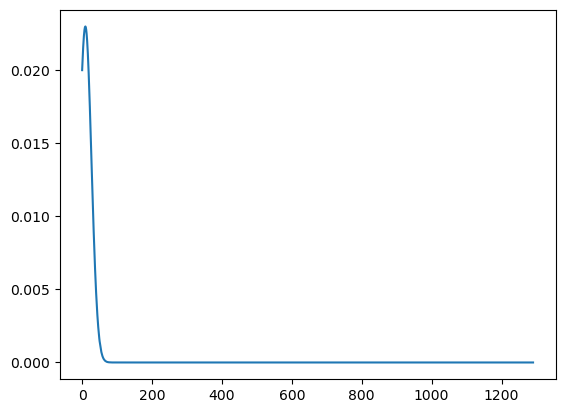

In [178]:
# Using Matplotlib to plot the normal distrubtion of the price ranges to see if we can use a simple 3-sigma rule to exclude outliers

import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

x_axis = np.sort(df3['menus.amountMin'])

minmean = statistics.mean(x_axis)
minstd = statistics.stdev(x_axis)

plt.plot(x_axis, norm.pdf(x_axis, minmean, minstd))
plt.show()

In [179]:
# We'll use the 3-sigma rule to remove rows containing outliers. 
# This means for 'priceRangeMin' any value less than 3 standard deviations from the mean is considered an outlier
# and any value greater than 3 standard deviations from the mean is also considered an outlier.
# SciPy has a stats library with a zscore object that does this super easily.

df4 = df3[(np.abs(stats.zscore(df3['menus.amountMin'])) < 3)]

In [180]:
# Sure enough we have removed 10 rows of outliers and the max is now 50 (50 dollars for a taco??)

df4['menus.amountMin'].describe(include='all')

count    27050.000000
mean         8.559964
std          4.686688
min          0.000000
25%          5.500000
50%          8.000000
75%         10.990000
max         59.950000
Name: menus.amountMin, dtype: float64

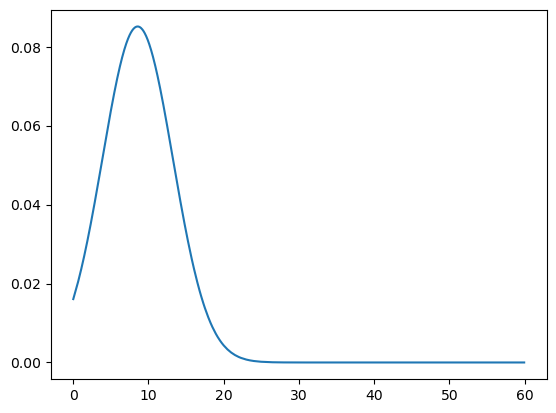

In [181]:
x_axis = np.sort(df4['menus.amountMin'])

minmean = statistics.mean(x_axis)
minstd = statistics.stdev(x_axis)

plt.plot(x_axis, norm.pdf(x_axis, minmean, minstd))
plt.show()

In [190]:
# Still not happy with the distribution so going to just remove all values below 30.

df5 = df4[df4['menus.amountMin'] < 24]
df5['menus.amountMin'].describe(include='all')

count    26801.000000
mean         8.328260
std          3.937278
min          0.000000
25%          5.500000
50%          8.000000
75%         10.950000
max         23.950000
Name: menus.amountMin, dtype: float64

In [191]:
# Do it again for max

df6 = df5[(np.abs(stats.zscore(df5['menus.amountMax'])) < 3)]

In [192]:
df6['menus.amountMax'].describe(include='all')

count    26797.000000
mean         8.405520
std          3.979699
min          0.000000
25%          5.500000
50%          8.000000
75%         10.990000
max         30.300000
Name: menus.amountMax, dtype: float64

In [193]:
# We can now save as a new .csv to be brought into Tableau to make a map vizualization of burrito and taco prices!

df6.to_csv('tacos_and_burritos_clean.csv')